In [ ]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

In [ ]:
df = pd.read_csv('/content/sgemm_product.csv')

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241600 entries, 0 to 241599
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MWG        241600 non-null  int64  
 1   NWG        241600 non-null  int64  
 2   KWG        241600 non-null  int64  
 3   MDIMC      241600 non-null  int64  
 4   NDIMC      241600 non-null  int64  
 5   MDIMA      241600 non-null  int64  
 6   NDIMB      241600 non-null  int64  
 7   KWI        241600 non-null  int64  
 8   VWM        241600 non-null  int64  
 9   VWN        241600 non-null  int64  
 10  STRM       241600 non-null  int64  
 11  STRN       241600 non-null  int64  
 12  SA         241600 non-null  int64  
 13  SB         241600 non-null  int64  
 14  Run1 (ms)  241600 non-null  float64
 15  Run2 (ms)  241600 non-null  float64
 16  Run3 (ms)  241600 non-null  float64
 17  Run4 (ms)  241600 non-null  float64
dtypes: float64(4), int64(14)
memory usage: 33.2 MB


No null in the dataset

In [ ]:
df.describe()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms)
count,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000,241600.000000
mean,80.415364,80.415364,25.513113,13.935894,13.935894,17.371126,17.371126,5.000000,2.448609,2.448609,0.500000,0.500000,0.500000,0.500000,217.647852,217.579536,217.532756,217.527669
std,42.469220,42.469220,7.855619,7.873662,7.873662,9.389418,9.389418,3.000006,1.953759,1.953759,0.500001,0.500001,0.500001,0.500001,369.012422,368.677309,368.655118,368.677413
min,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.290000,13.250000,13.360000,13.370000
25%,32.000000,32.000000,16.000000,8.000000,8.000000,8.000000,8.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,40.660000,40.710000,40.660000,40.640000
50%,64.000000,64.000000,32.000000,8.000000,8.000000,16.000000,16.000000,5.000000,2.000000,2.000000,0.500000,0.500000,0.500000,0.500000,69.825000,69.930000,69.790000,69.820000
75%,128.000000,128.000000,32.000000,16.000000,16.000000,32.000000,32.000000,8.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,228.530000,228.310000,228.320000,228.320000
max,128.000000,128.000000,32.000000,32.000000,32.000000,32.000000,32.000000,8.000000,8.000000,8.000000,1.000000,1.000000,1.000000,1.000000,3339.630000,3375.420000,3397.080000,3361.710000


THREE (3) runs with long performance times are Run2, Run3 and Run4


In [ ]:
df['avg'] = df[['Run2 (ms)', 'Run3 (ms)', 'Run4 (ms)']].mean(axis=1)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms),Run4 (ms),avg
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,115.26,115.87,118.55,115.80,116.740000
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.13,78.25,79.25,79.19,78.896667
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,79.84,80.69,80.76,80.97,80.806667
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,84.32,89.90,86.75,85.58,87.410000
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,115.13,121.98,122.73,114.81,119.840000


In [ ]:
df = df.drop(columns =['Run1 (ms)','Run2 (ms)','Run3 (ms)','Run4 (ms)'], axis = 1)

In [ ]:
df.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,116.740000
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,78.896667
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,80.806667
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,87.410000
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,119.840000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdf3568f450>,
      dtype=object)

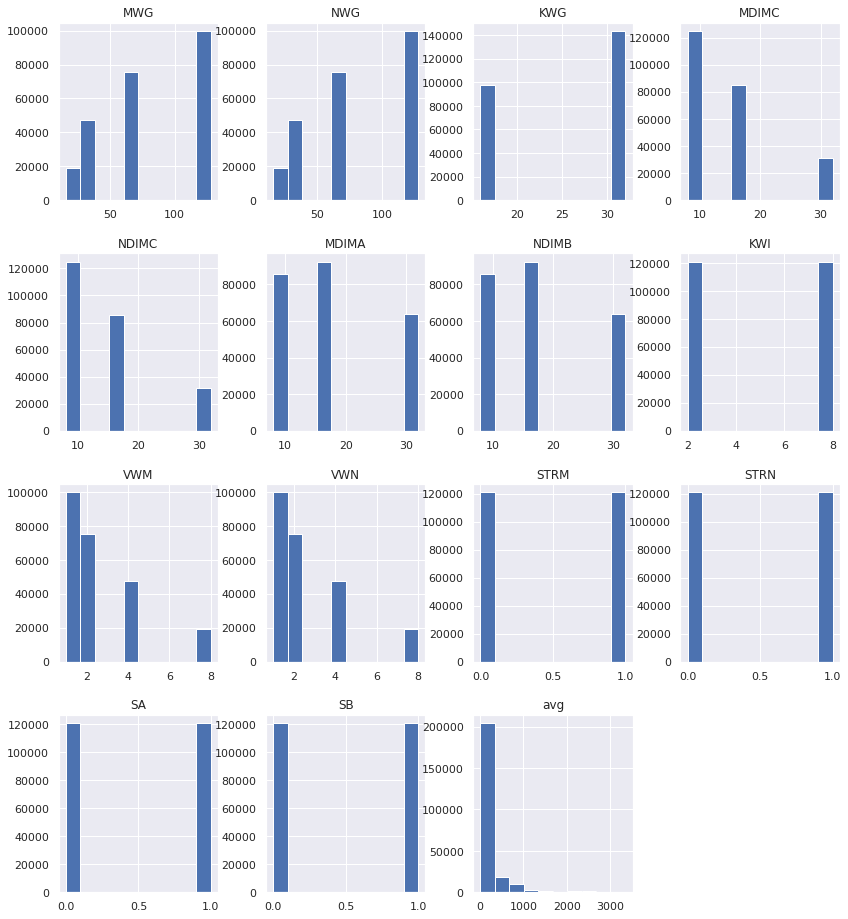

In [ ]:
sns.set()
df.hist(figsize=(14,16))

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MWG,241600.0,80.415364,42.469220,16.000000,32.00,64.000000,128.000000,128.000000
NWG,241600.0,80.415364,42.469220,16.000000,32.00,64.000000,128.000000,128.000000
KWG,241600.0,25.513113,7.855619,16.000000,16.00,32.000000,32.000000,32.000000
MDIMC,241600.0,13.935894,7.873662,8.000000,8.00,8.000000,16.000000,32.000000
NDIMC,241600.0,13.935894,7.873662,8.000000,8.00,8.000000,16.000000,32.000000
MDIMA,241600.0,17.371126,9.389418,8.000000,8.00,16.000000,32.000000,32.000000
NDIMB,241600.0,17.371126,9.389418,8.000000,8.00,16.000000,32.000000,32.000000
KWI,241600.0,5.000000,3.000006,2.000000,2.00,5.000000,8.000000,8.000000
VWM,241600.0,2.448609,1.953759,1.000000,1.00,2.000000,4.000000,8.000000
VWN,241600.0,2.448609,1.953759,1.000000,1.00,2.000000,4.000000,8.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


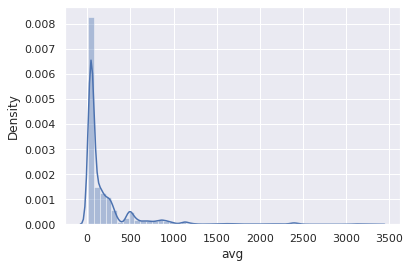

In [ ]:
sns.distplot(df['avg'])


Target Transformation 
Use logarithmic transformation as it follows a logarithmic distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


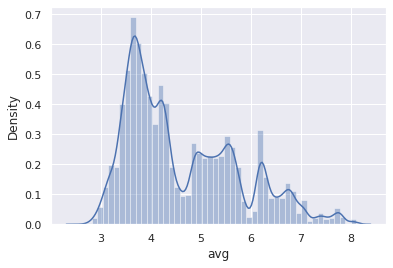

In [ ]:
df['avg']=np.log(df.avg)
sns.distplot(df['avg'])

# Design a linear regression model to estimate the target using only THREE (3) attributes from the dataset

In [ ]:
X = df.copy()
X.head()

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,avg
0,16,16,16,8,8,8,8,2,1,1,0,0,0,0,4.759949
1,16,16,16,8,8,8,8,2,1,1,0,0,0,1,4.368139
2,16,16,16,8,8,8,8,2,1,1,0,0,1,0,4.392059
3,16,16,16,8,8,8,8,2,1,1,0,0,1,1,4.470610
4,16,16,16,8,8,8,8,2,1,1,0,1,0,0,4.786158


In [ ]:
Y = pd.DataFrame(df, columns=['avg'])
Y.head()

,avg
0,4.759949
1,4.368139
2,4.392059
3,4.470610
4,4.786158


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape

(193280, 15)

In [ ]:
Y_train.shape

(193280, 1)

Text(0.5, 1.0, 'Features Correlating with average runtime')

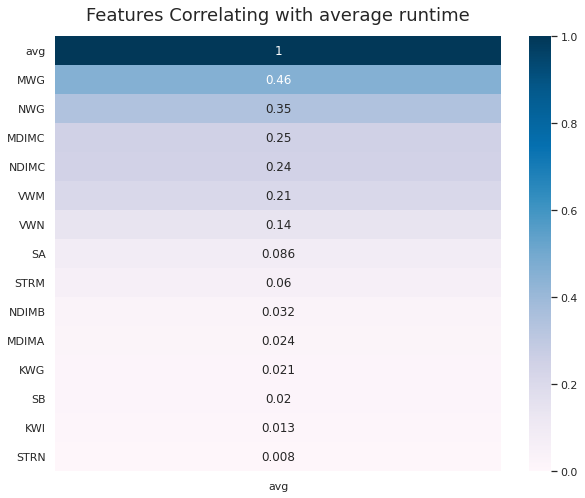

In [ ]:
plt.figure(figsize=(10,8))
#rank the absolute values of the parameters' correlation
heatmap = sns.heatmap(abs(X_train.corr()[['avg']]).sort_values(by='avg', ascending=False), vmin=0, vmax=1, annot=True, cmap='PuBu')
heatmap.set_title('Features Correlating with average runtime', fontdict={'fontsize':18}, pad=16)

Top 3 features are MWG NWG MDIMC

In [ ]:
top_3_features = ['MWG','NWG','MDIMC']
X_new = X_train[top_3_features]
X_new_test = X_test[top_3_features]
X_new.head()

,MWG,NWG,MDIMC
215722,128,128,32
29286,32,32,16
51462,32,128,8
205641,128,128,8
161752,128,32,8


In [ ]:
X_new_test.head()

,MWG,NWG,MDIMC
51475,32,128,8
121112,64,128,16
240663,128,128,32
180402,128,64,16
14648,16,128,8


# Without scaling

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_new, Y_train)

# Make predictions using the testing set
Y_pred = regr.predict(X_new_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, Y_pred))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test, Y_pred))
print("RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test, Y_pred)))
# Explained variance score: 1 is perfect prediction
# To get the best r2 square, construct train,validation and test dataset
# Plug in validation and prediction of validation data to get the best r2 score
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

Coefficients: 
 [[ 0.01298594  0.00915808 -0.04291242]]
Intercept:  [3.44025396]
Mean squared error: 0.74
Mean absolute error: 0.70
RMSE: 0.86
Variance score: 0.42


## The linear regression equation is as follow
## Avg run time = 3.44 + (0.01 x MWG) + (0.009 x NWG) - (0.04 x MDIMC)
## We can conclude that the performance of the SGEMM Kernel has postitive correlation with MWG & NWG and negative correlation with MDIMC

# With Scaling

In [ ]:
scaler = StandardScaler()
X_new1 = scaler.fit_transform(X_new) 
X_new_test1 = scaler.transform(X_new_test)

scaler_y = StandardScaler()
Y_train1 = scaler_y.fit_transform(Y_train)
Y_test1 = scaler_y.transform(Y_test)

In [ ]:
X_new1 = pd.DataFrame(X_new1, columns = top_3_features)
X_new_test1 = pd.DataFrame(X_new_test1, columns = top_3_features)

Y_train1 = pd.DataFrame(Y_train1, columns=['avg'])
Y_test1 = pd.DataFrame(Y_test1, columns=['avg'])
X_new1.head()

,MWG,NWG,MDIMC
0,-0.385106,-0.386915,-0.754230
1,1.122143,1.119506,0.260475
2,1.122143,1.119506,0.260475
3,1.122143,-1.140125,-0.754230
4,1.122143,1.119506,-0.754230


In [ ]:
Y_train1.head()

,avg
0,-0.670899
1,0.887161
2,1.342247
3,0.843746
4,1.583834


In [ ]:
# Create linear regression object with scaling

# Train the model using the training sets
regr.fit(X_new1, Y_train1)

# Make predictions using the testing set
Y_pred1 = regr.predict(X_new_test1)

# The coefficients
print('Coefficients: \n', regr.coef_)
print ('Intercept: ', regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test1, Y_pred1))
print("Mean absolute error: %.2f"
      % mean_absolute_error(Y_test1, Y_pred1))
print("RMSE: %.2f"
      % np.sqrt(mean_squared_error(Y_test1, Y_pred1)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(Y_test1, Y_pred1))

Coefficients: 
 [[ 0.48907642  0.3451011  -0.30008329]]
Intercept:  [9.35534289e-16]
Mean squared error: 0.58
Mean absolute error: 0.62
RMSE: 0.76
Variance score: 0.42


## Since R2 score for both scaled data and unscaled data are of the same value of 0.42, scaling of data does not improve performance of the model